# Laboratorio 07 Interpolación

#### Métodos computacionales para físicos  y astrónomos
#### Universidad de Antioquia
#### Prof: Hernan D. Salinas Jiménez & Juan Marcos Marín Ramírez

##1. Interpolación Lagrange

Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.

 Para este numeral, emplee que:


La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicSpline
from scipy.interpolate import interp1d
import pandas as pd

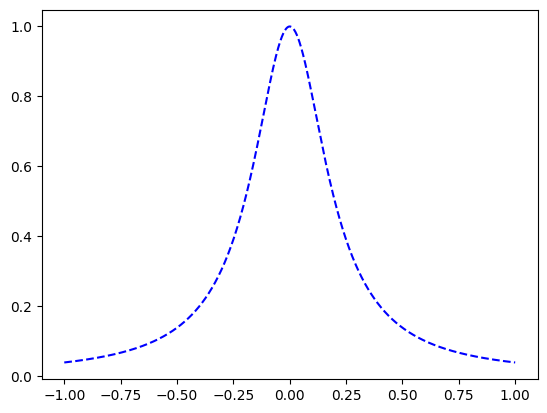

In [2]:
f=lambda x:1/(1+25*x**2)
x=np.linspace(-1,1,1000)

plt.plot(x,f(x),'b--')
plt.show()

In [3]:
N=4
n=N+1
x_=np.linspace(-1,1,n)  #Puntos a interpolar
pl=lagrange(x_,f(x_))  #Me dice cuál es el grado del polinomio#Función de interpolación #lagrange(x,w) w representa la función evaluada en los puntos

xL=np.linspace(np.min(x_),np.max(x_))  #generando un conjunto de datos para mirara como es la función que me une los puntos a interpolar
pl

poly1d([ 3.31564987e+00,  1.04083409e-17, -4.27718833e+00,  5.20417043e-18,
        1.00000000e+00])

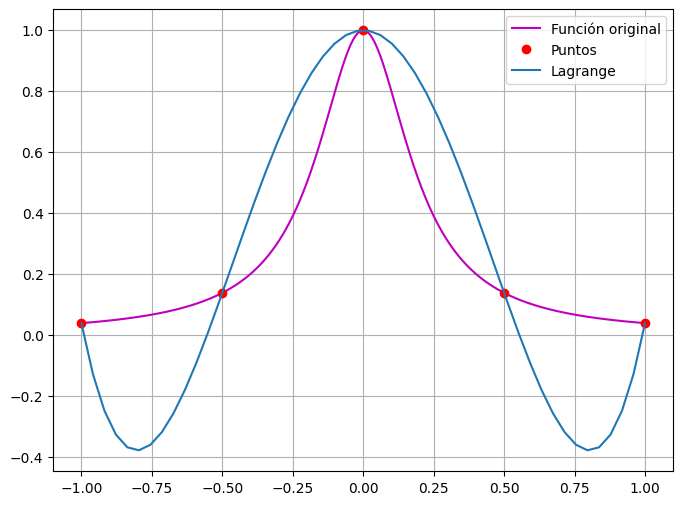

In [4]:
plt.figure(figsize=(8,6))
plt.plot(x,f(x),'m-', label='Función original')
plt.plot(x_,f(x_),'ro', label='Puntos')
plt.plot(xL,pl(xL),'-',label='Lagrange')
#plt.ylim(-1)
plt.grid()
plt.legend()

In [5]:
#b). Grado 4
import sympy as sp
sp.init_printing

f_s=lambda y: 1/(1+25*y**2)
y=sp.symbols('y')
f_s(y)

1/(25*y**2 + 1)

In [6]:
df5=sp.diff(f_s(y),y,5)  #para calcular derivada  parcial #función evaluada en y respecto a qué quiero que me la evalue #número de la derivada  #quinta derivada de f
df5

3750000*y*(-10000*y**4/(25*y**2 + 1)**2 + 400*y**2/(25*y**2 + 1) - 3)/(25*y**2 + 1)**4

In [7]:
f5=sp.lambdify(y,df5,'numpy')  #convierte una expresión de sympy a una expresión de numpy #función con respecto a la variable
f5 #vemos que es una función

<function _lambdifygenerated(y)>

In [8]:
f5(4)

-0.0017172546980796805

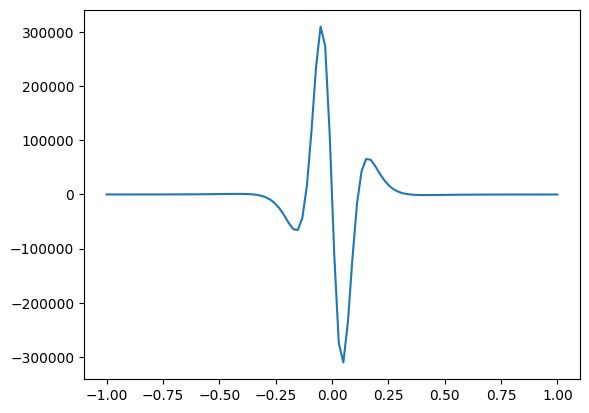

-0.050505050505050386

In [9]:
x5=np.linspace(-1,1,100)
plt.plot(x5,f5(x5))   #función de error
plt.show()
x_max=np.max(abs(f5(x5)))
x_max
x_zeta=np.argmax(abs(f5(x5)))
x5[x_zeta]

In [10]:
import math as mt

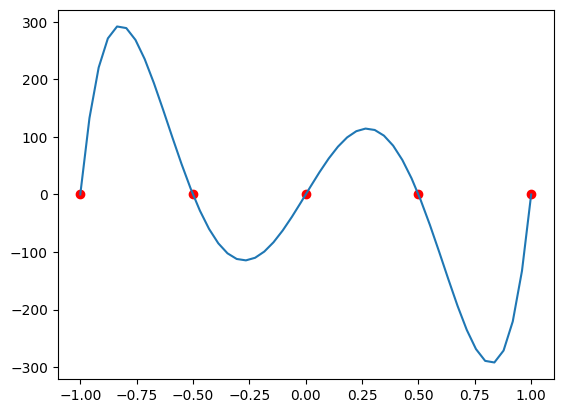

In [11]:
plt.plot(x_,f(x_), 'ro', label='Función')
plt.plot(xL,x_max/mt.factorial(n)*(xL-x_[0])*(xL-x_[1])*(xL-x_[2])*(xL-x_[3])*(xL-x_[4]))
#en los puntos el error es cero

##2. Tangente

Para la función $f(x) = \tan (x)$ definida entre $-\frac{\pi}{4}$ y $\frac{\pi}{4}$, usando $N=10$ (9 intervalos). Grafique la función original y aquella interpolada usando Lagrange.

Explore el comportamiento del algoritmo de interpolación lineal al variar el número de datos utilizados.

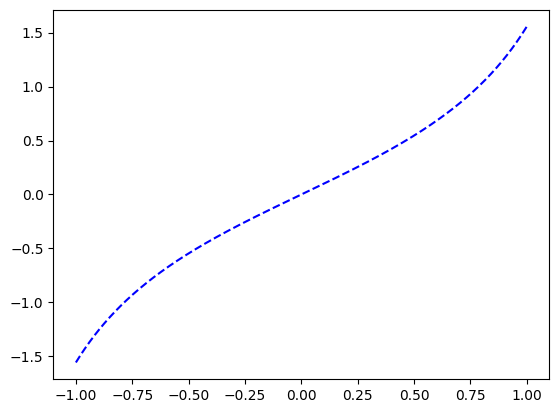

In [12]:
f1=lambda x: np.tan(x)
x1=np.linspace(-np.pi/4,np.pi/4,1000)

plt.plot(x,f1(x),'b--')
plt.show()


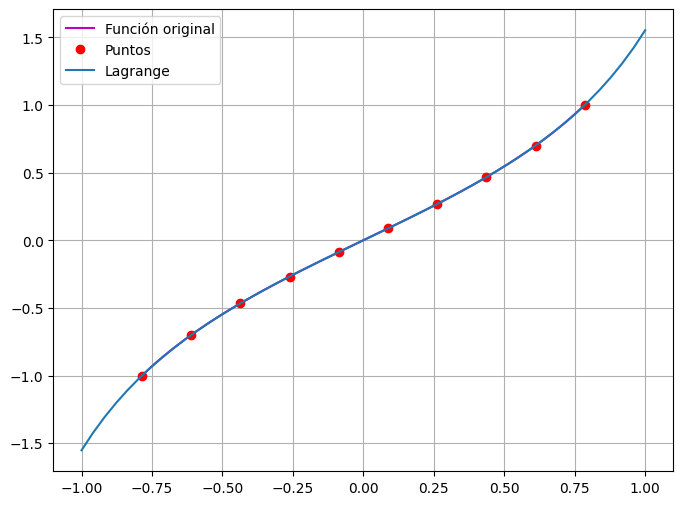

In [13]:
N=9
n=N+1
x_=np.linspace(-np.pi/4,np.pi/4,n)
pl=lagrange(x_,f1(x_))  #Me dice cuál es el grado del polinomio#Función de interpolación #lagrange(x,w) w representa la función evaluada en los puntos
xL1=np.linspace(np.min(x_),np.max(x_))  #generando un conjunto de datos para mirara como es la función que me une los puntos a interpolar

plt.figure(figsize=(8,6))
plt.plot(x1,f1(x1),'m-', label='Función original')
plt.plot(x_,f1(x_),'ro', label='Puntos')
plt.plot(xL,pl(xL),'-',label='Lagrange')
#plt.ylim(-1)
plt.grid()
plt.legend()


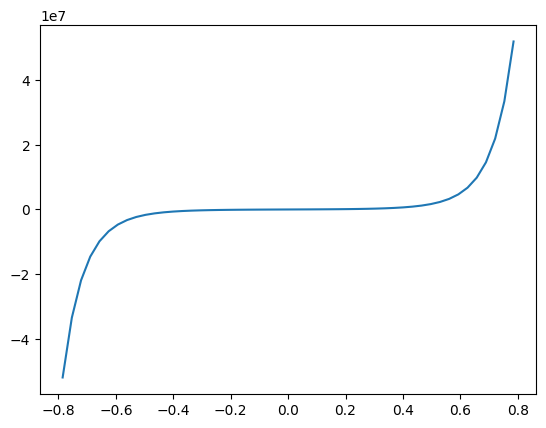

-0.7853981633974483

In [14]:
#hallar el error y buscar otro método de interpolcion
f_s1=lambda y: sp.tan(y)
y=sp.symbols('y')
f_s1(y)
df10=sp.diff(f_s1(y),y,10)  #para calcular derivada  parcial #función evaluada en y respecto a qué quiero que me la evalue #número de la derivada  #quinta derivada de f
df10
f10=sp.lambdify(y,df10,'numpy')
x10=np.linspace(-np.pi/4,np.pi/4,)
plt.plot(x10,f10(x10))
plt.show()
x_max=np.max(abs(f10(x10)))
x_max
x_zeta=np.argmax(abs(f10(x10)))
x10[x_zeta]

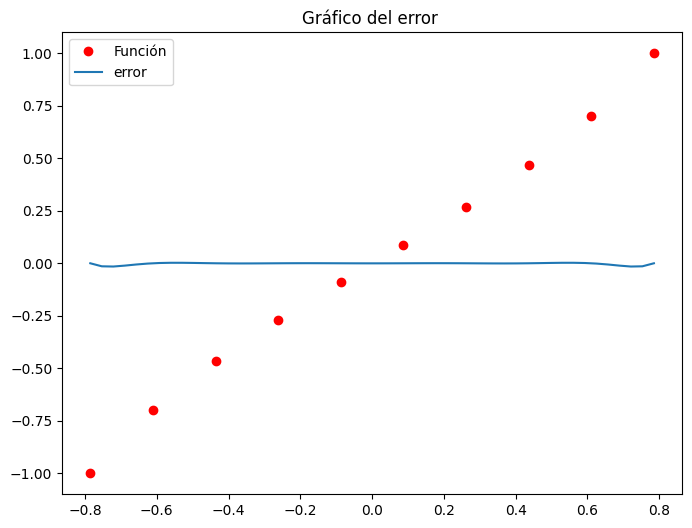

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(x_,f1(x_), 'ro', label='Función')
plt.plot(xL1,x_max/mt.factorial(n)*(xL1-x_[0])*(xL1-x_[1])*(xL1-x_[2])*(xL1-x_[3])*(xL1-x_[4])*(xL1-x_[5])*(xL1-x_[6])*(xL1-x_[7])*(xL1-x_[8])*(xL1-x_[9]),label='error')
plt.title('Gráfico del error ')
plt.legend()

Podemos observar que el error asociado a la interpolación de Lagrange es cero, lo cual tiene mucho sentido pues vemos que el polinio de Lagrange tiene la misma forma de la función original  $f(x) = \tan (x)$

##3. Datos

Usando los siguientes datos:
```
x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
```
a)  Cree un dataframe y utilizando la interpolación de Lagrange encuentre



valores intermedios, esto es,

```
new_x_range = np.arange(1.1, 2.1, 0.1)
```
b) Haga un gráfico donde muestre los valores originales y aquellos interpolados.

c) Utilizando un método diferente a Lagrange repita el procedimiento y explique si hay alguna diferencia


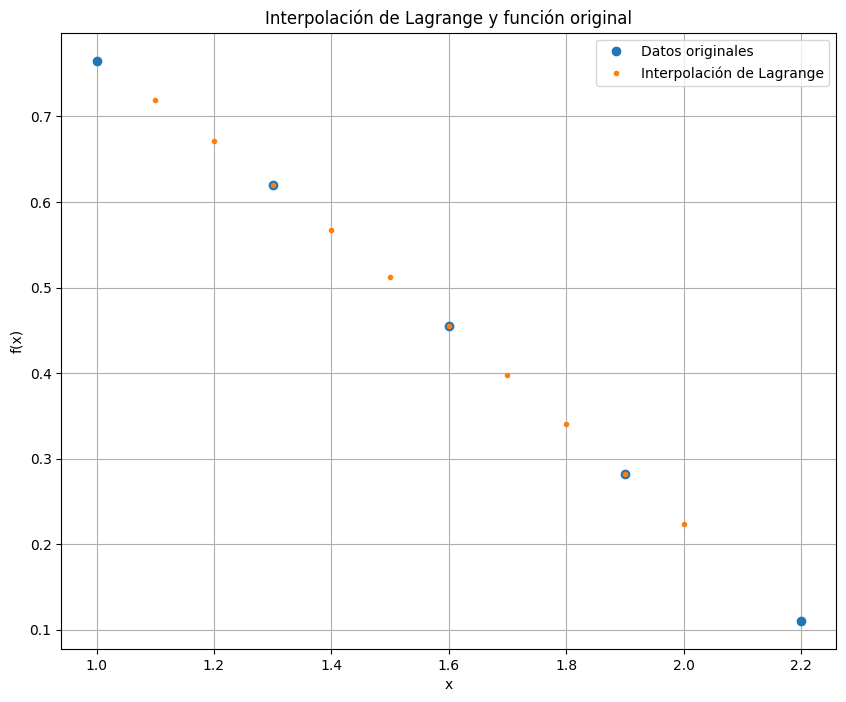

In [38]:
x = np.array([1, 1.3, 1.6, 1.9, 2.2])
fx = np.array([0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623])
df = pd.DataFrame({'x': x, 'fx': fx}) #dataframe datos originales
new_x_range = np.arange(1.1, 2.1, 0.1) # Valores intermedios

intl= lagrange(x, fx)
l = intl(new_x_range)

plt.figure(figsize=(10, 8))
plt.plot(x, fx, 'o', label='Datos originales')
plt.plot(new_x_range, l,'.', label='Interpolación de Lagrange')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolación de Lagrange y función original')
plt.legend()
plt.grid(True)
plt.show()

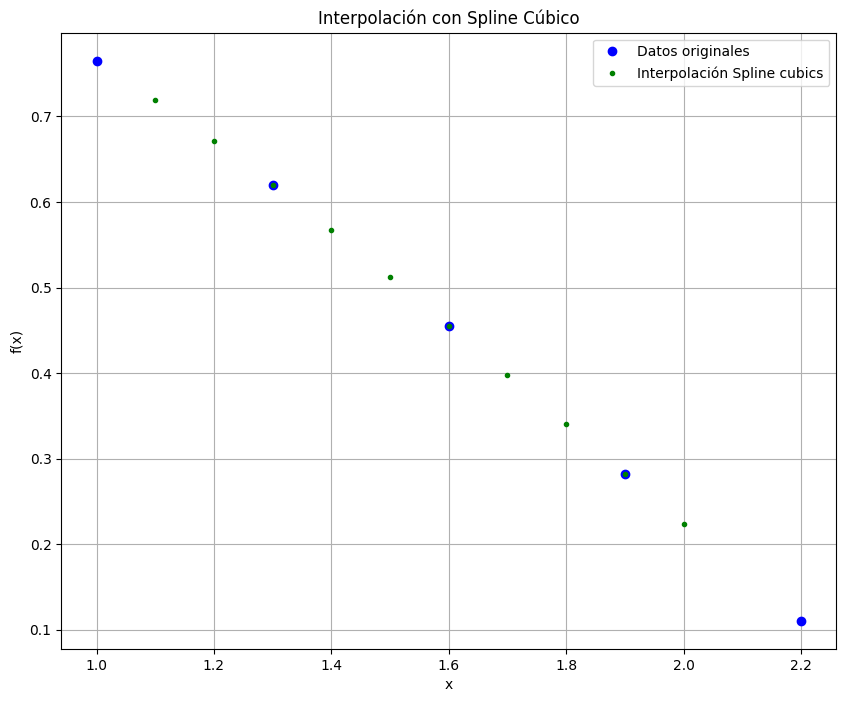

In [40]:
spline= interp1d(x, fx, kind='cubic')  #interpolcación usando slpine cubics
intspline= spline(new_x_range)
plt.figure(figsize=(10, 8))
plt.plot(x, fx, 'bo', label='Datos originales')
plt.plot(new_x_range, intspline, 'g.', label='Interpolación Spline cubics')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolación con Spline Cúbico')
plt.legend()
plt.grid(True)
plt.show()

##4. Interpolación en imágenes


# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).




Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

In [18]:
import urllib.request
pato='https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')#Decargar la imagen
imagen_pato=plt.imread('pato.jpg') #Variable con la imagen del pato

In [48]:
x=np.array([0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3])
fx=np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25])
interpolacion_lagrange = lagrange(x, fx)  #interpolación con polinomio de Lagrange
interpolacion_spline = CubicSpline(x, fx) #interpolación con spline cúbico
xl = np.linspace(min(x), max(x), 10000) #generando un conjunto de datos para mirar como es la función que me une los puntos a interpolar

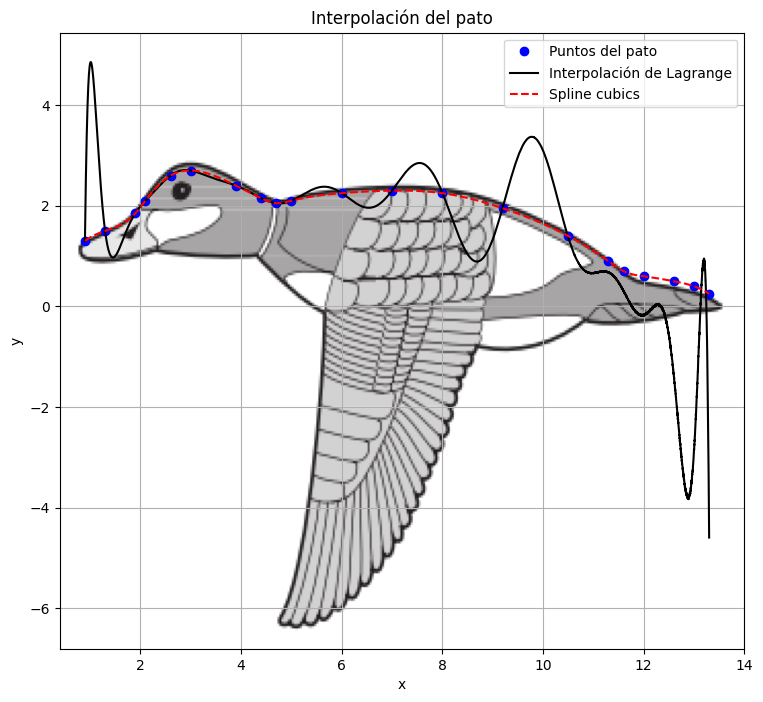

In [49]:
plt.figure(figsize=(10, 8))
plt.imshow(imagen_pato,extent=[0.4,14,-6.8,3.45])
plt.title('Imagen del pato')

plt.plot(x, fx, 'bo', label='Puntos del pato')
plt.plot(xl,  interpolacion_lagrange(xl), 'k-', label='Interpolación de Lagrange')
plt.plot(xl,interpolacion_spline(xl), 'r--', label='Spline cubics')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolación del pato')
plt.legend()
plt.grid(True)
plt.show()
